In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### load dataset

In [7]:
df = pd.read_csv("data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [8]:
df.shape

(270, 14)

* age ------  age in years
* sex ------  1 = male, 0 = female
* cp -------  chest pain type
* trestbps--  resting blood pressure (in mm Hg on admission to the hospital)
* chol -----  serum cholestoral in mg/dl
* fbs ------  (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg --  resting electrocardiographic result
* thalach --  maximum heart rate achieved
* exang ----  exercise induced angina (1 = yes; 0 = no)
* oldpeak --  ST depression induced by exercise relative to rest
* slope ----  the slope of the peak exercise ST segment
* ca -------  number of major vessels (0-3) colored by flourosopy
* thal -----  1 = normal, 2 = fixed defect, 3 = reversable defect


In [9]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [10]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,1
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,2
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,2
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,2
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [12]:
df.target.value_counts()

1    150
2    120
Name: target, dtype: int64

### Feature engineering

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

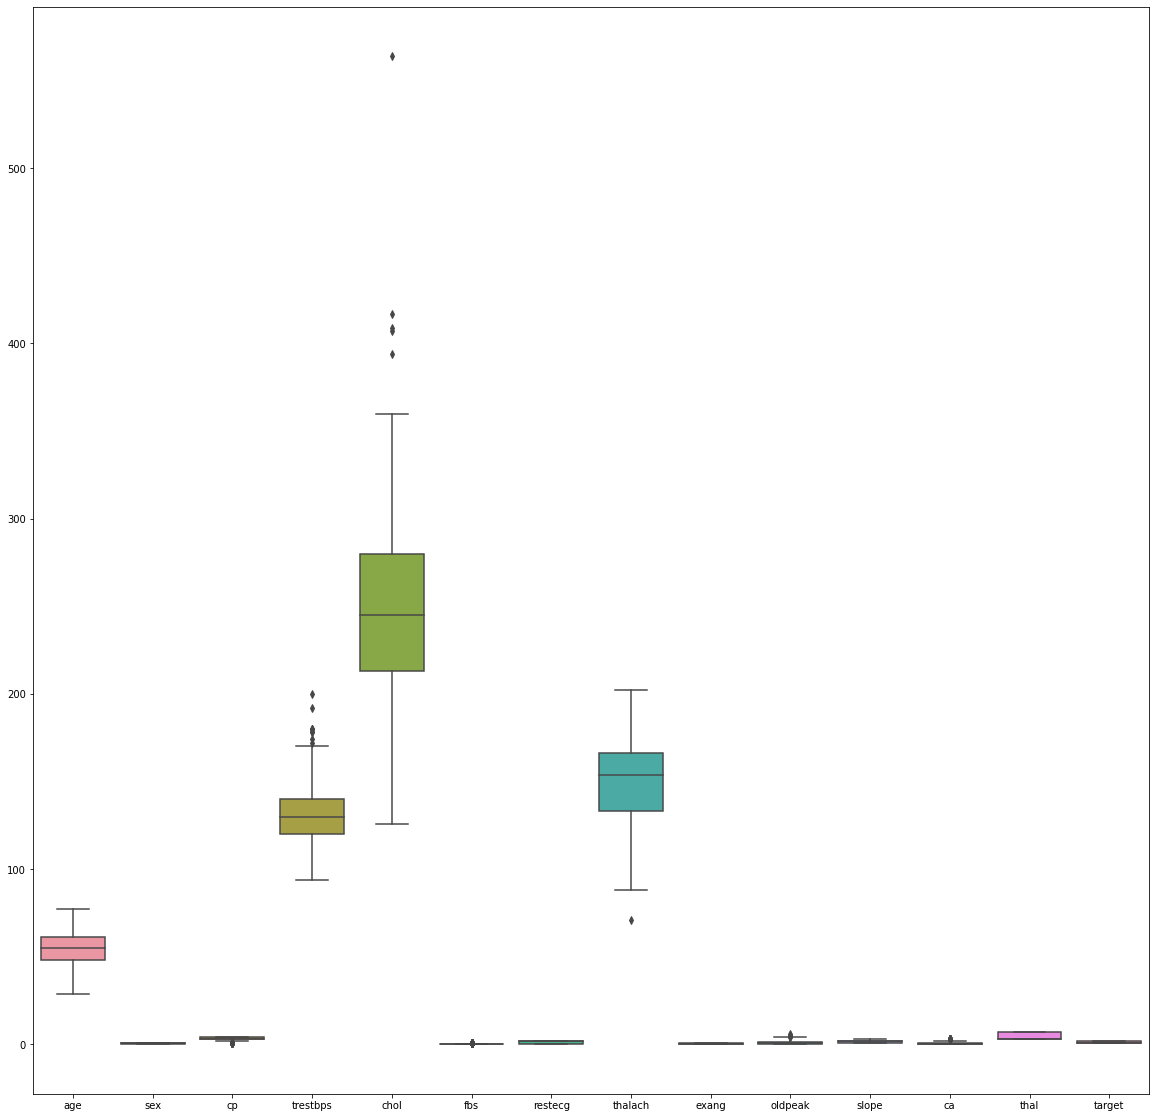

In [14]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

### Feature selection

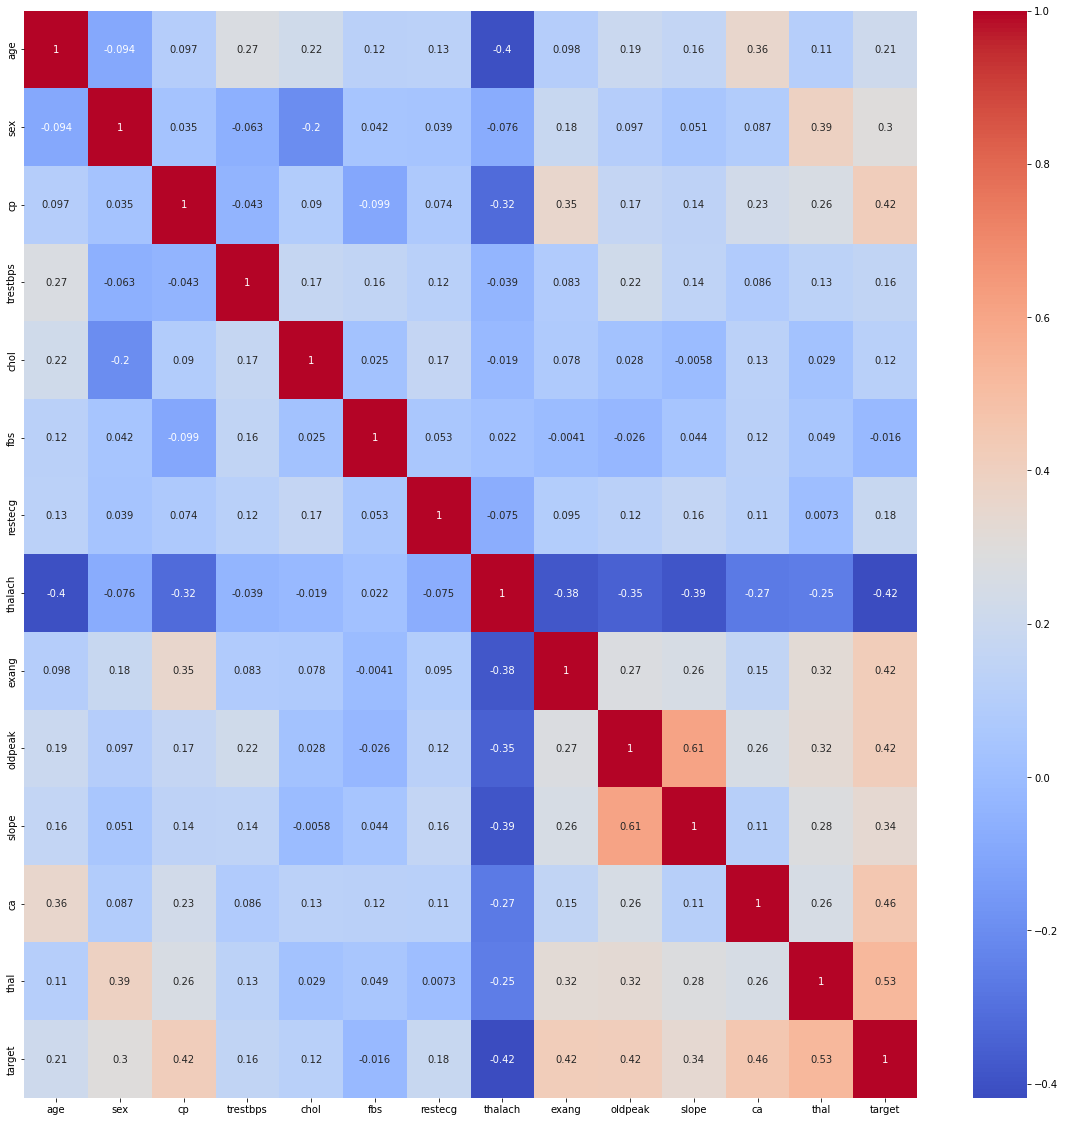

In [15]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot= True)

In [16]:
# df = df.drop(columns= "chol")
# df.head()

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


### Feature scalling

In [18]:
#using standard scaler.
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
#dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3,2
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7,1
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7,2
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7,1
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3,1


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3,2
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7,1
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7,2
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7,1
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3,1


In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2.700000e+02,270.000000,270.000000,2.700000e+02,2.700000e+02,270.000000,270.000000,2.700000e+02,270.000000,2.700000e+02,270.000000,270.000000,270.000000,270.000000
mean,3.667848e-16,0.677778,3.174074,5.682697e-16,-2.467162e-16,0.148148,1.022222,2.631640e-17,0.329630,-5.263280e-17,1.585185,0.670370,4.696296,1.444444
std,1.001857e+00,0.468195,0.950090,1.001857e+00,1.001857e+00,0.355906,0.997891,1.001857e+00,0.470952,1.001857e+00,0.614390,0.943896,1.940659,0.497827
min,-2.797275e+00,0.000000,1.000000,-2.094649e+00,-2.396942e+00,0.000000,0.000000,-3.402609e+00,0.000000,-9.185652e-01,1.000000,0.000000,3.000000,1.000000
25%,-7.075676e-01,0.000000,3.000000,-6.363095e-01,-7.105825e-01,0.000000,0.000000,-7.212705e-01,0.000000,-9.185652e-01,1.000000,0.000000,3.000000,1.000000
50%,6.232461e-02,1.000000,3.000000,-7.540984e-02,-9.031247e-02,0.000000,2.000000,1.653012e-01,0.000000,-2.187060e-01,2.000000,0.000000,3.000000,1.000000
75%,7.222322e-01,1.000000,4.000000,4.854898e-01,5.881079e-01,0.000000,2.000000,7.058937e-01,1.000000,4.811532e-01,2.000000,1.000000,7.000000,2.000000
max,2.481986e+00,1.000000,4.000000,3.850888e+00,6.093004e+00,1.000000,2.000000,2.262800e+00,1.000000,4.505343e+00,3.000000,3.000000,7.000000,2.000000


### visualisation

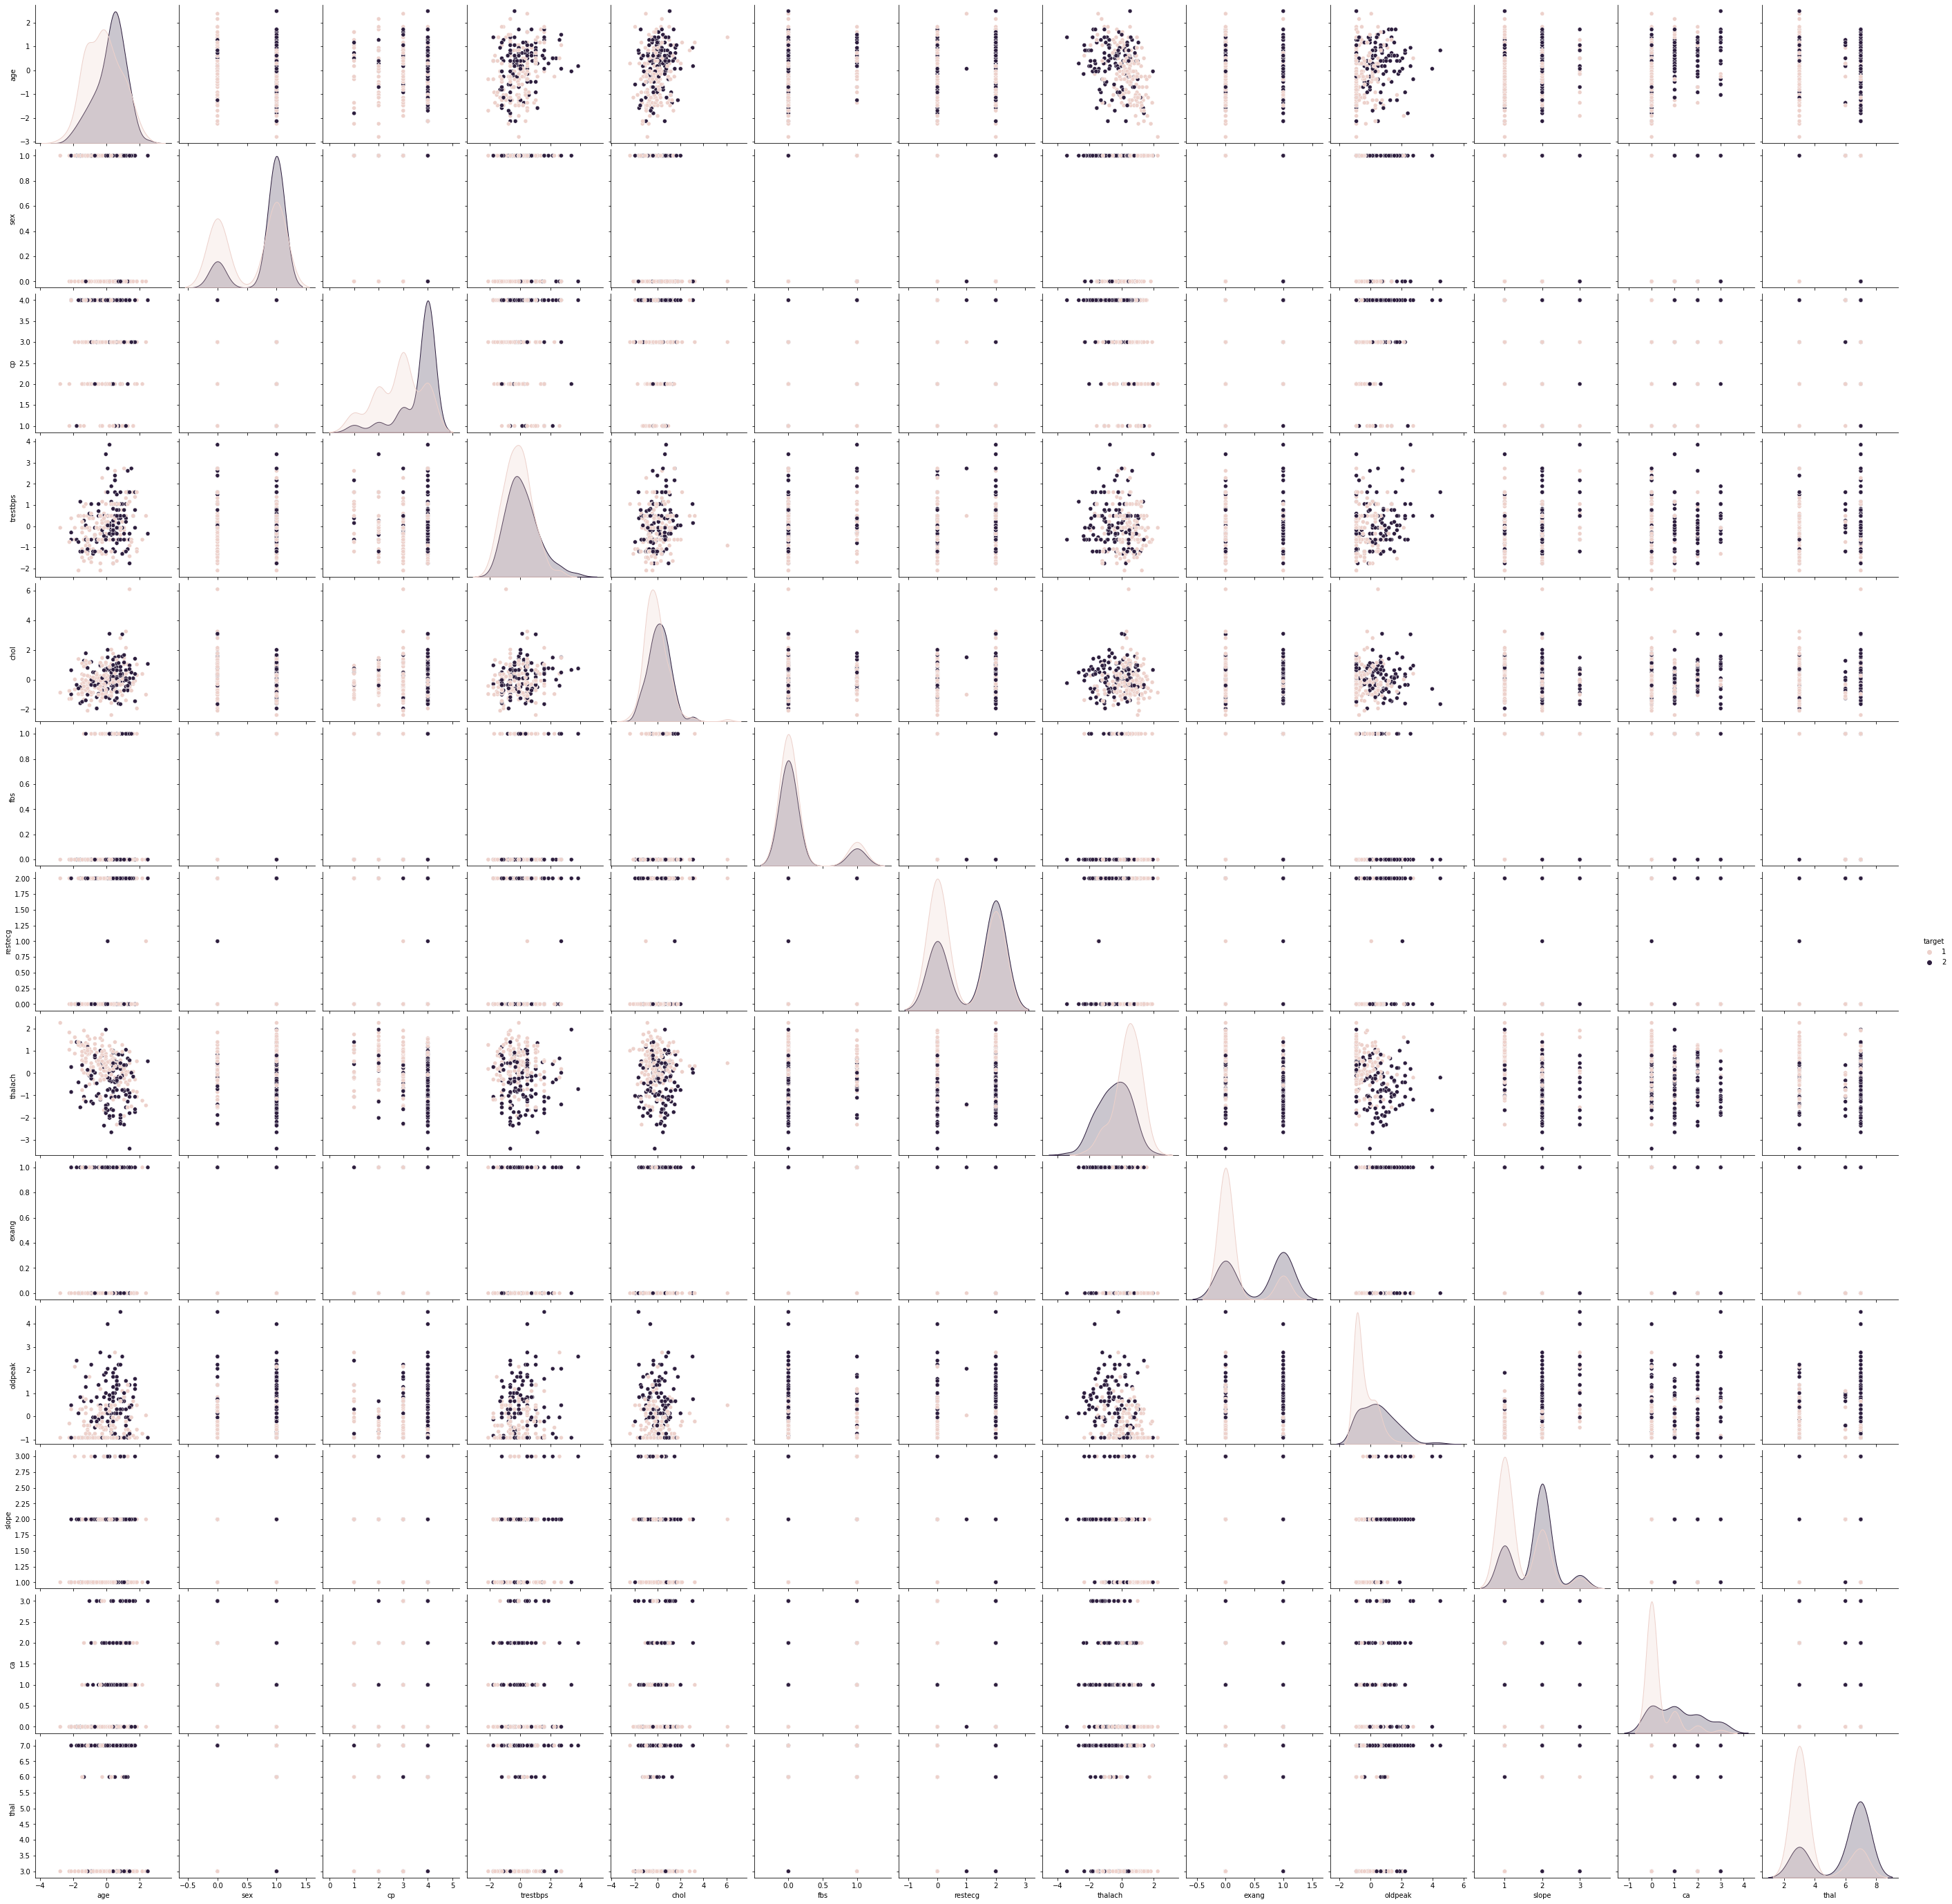

In [22]:
sns.pairplot(df , hue="target", height=3, aspect=1);

### model selection

In [23]:
y = df['target']
X = df.drop(['target'], axis = 1) 

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)  

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### K – Nearest Neighbor Classifier

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.7592592592592593

In [28]:
score.mean()

0.8380952380952381

In [29]:
knn_classifier  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=1,
 weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.7592592592592593

In [30]:
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.8476190476190476

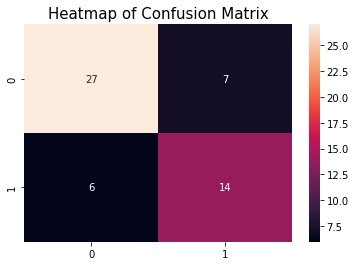

In [31]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [32]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.82      0.79      0.81        34
           2       0.67      0.70      0.68        20

    accuracy                           0.76        54
   macro avg       0.74      0.75      0.74        54
weighted avg       0.76      0.76      0.76        54



### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.7592592592592593

In [34]:
score=cross_val_score(rf_classifier,X_train,y_train,cv=10)
score.mean()

0.8564935064935064

### Saving  Model Using pickle

In [35]:
## Pickle
import pickle

# save model
pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)




In [36]:
# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')


Confusion matrix of K – Nearest Neighbor model: 
 [[27  7]
 [ 6 14]] 



In [37]:
# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Accuracy of K – Nearest Neighbor  model =  0.7592592592592593
